In [1]:
!pip install -q -U --user lightgbm
!pip install -q --user git+https://github.com/DataCanvasIO/Hypernets hypergbm

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [3]:
pd.set_option('display.max.columns',50)
pd.set_option('display.max.rows',50)

In [4]:
df_train= pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
df_test= pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

df_train.shape,df_test.shape

((20758, 18), (13840, 17))

In [5]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
target = 'NObeyesdad'


# training

In [7]:
from hypernets.core.search_space import Choice,Int
from hypergbm.search_space import GeneralSearchSpaceGenerator
from hypergbm import make_experiment

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(20758, 17)","(20758,)",None,None,None,multiclass(7)


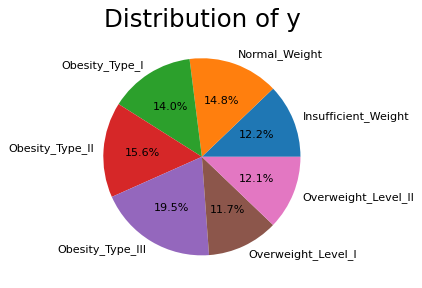

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[id, Gender, Age, Height, Weight, family_histo..."
1,selected_features,"[Gender, Age, Height, Weight, family_history_w..."
2,unselected_features,[id]
3,X_train.shape,"(20758, 16)"
4,y_train.shape,"(20758,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{'id': 'idness'}
9,kept/dropped feature count,16/1


### Elapsed

* 0.145 seconds

## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,5


#### Experiment Settings:

HyperGBM(searcher=MCTSSearcher(space_fn=MySearchSpace(kwargs=None), optimize_direction='max'), callbacks=[EarlyStoppingCallback(mode='max', time_limit=3599.8538856506348), NotebookCallback(), ProgressiveCallback(), FitCrossValidationCallback()], task='multiclass', discriminator=OncePercentileDiscriminator(percentile=50, history=TrialHistory(direction='max'), optimize_direction='max'))

,X,y,X_eval,y_eval,cv,num_folds,max_trials,fit_kwargs
0,"(20758, 16)","(20758,)",None,None,True,5,300,()


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,300,0.906831,70,[0.9103478177088351],3142.29433,89,300


#### Best Trial:

key,value
signature,cc6fadb176611be89e8a29839e543453
vectors,"[0, 2, 1, 0, 20, 1, 295, 5, 1, 3, 1, 1]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,constant
2-numeric_or_scaler_0.hp_or,1
3-Module_LightGBMEstimator_1.feature_fraction,0.8
4-Module_LightGBMEstimator_1.min_data_in_leaf,20
5-Module_LightGBMEstimator_1.boosting_type,goss
6-Module_LightGBMEstimator_1.num_leaves,295
7-Module_LightGBMEstimator_1.max_depth,5


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,70,[0.9103478177088351],51.151338,"[0, 2, 1, 0, 20, 1, 295, 5, 1, 3, 1, 1]"
1,280,[0.9101069467193371],24.356351,"[0, 1, 2, 0, 10, 0, 415, 5, 2, 2, 0, 4]"
2,61,[0.9096733789382406],25.259479,"[0, 0, 2, 1, 40, 1, 355, 3, 2, 3, 0, 3]"
3,198,[0.9093361595529434],26.810102,"[0, 2, 2, 0, 10, 1, 345, 3, 2, 2, 3, 4]"
4,202,[0.908902591771847],24.313827,"[0, 2, 3, 0, 20, 0, 60, 5, 2, 1, 3, 4]"


search:   0%|          | 0/300 [00:00<?, ?it/s]

fit_cross_validation:   0%|          | 0/5 [00:00<?, ?it/s]

### Fitted parameters

,key,value
0,input_features,"[Gender, Age, Height, Weight, family_history_w..."
1,best_reward,[0.9103478177088351]
2,history,"TrialHistory(direction='max', size=300, succee..."


### Elapsed

* 3142.369 seconds

## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,30
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.26666666666666666, 0.1, 0.06666666666666667..."
1,scores,"[0.9103478177088351, 0.9113113016668273, 0.911..."
2,best_stack,"[0, 3, 0, 8, 3, 17, 3, 0, 3, 7, 3, 0, 4, 15, 9..."
3,hits,"{0: 8, 3: 8, 8: 2, 17: 1, 7: 1, 4: 1, 15: 1, 9..."
4,ensemble_size,30


### Elapsed

* 25.467 seconds

In [8]:

class MySearchSpace(GeneralSearchSpaceGenerator):
    def __init__(self, enable_lightgbm=True, enable_xgb=True, enable_catboost=False, enable_histgb=False,**kwargs): 
        super().__init__(enable_lightgbm=enable_lightgbm, 
                         enable_xgb=enable_xgb, 
                         enable_catboost=enable_catboost, 
                         enable_histgb=False,
                         **kwargs)

    @property
    def default_lightgbm_init_kwargs(self):
        return {
            'objective': 'multiclass',
            'num_class':7,
            'n_estimators': Choice([100, 200, 300, 500]),
            'boosting_type': Choice(['gbdt', 'goss']), #'dart',
            'num_leaves': Int(15, 513, 5),
            'learning_rate': Choice([0.01, 0.03, 0.1, 0.3]), #[0.001, 0.01, 0.03, 0.5, 0.1]
            'max_depth': Int(3,15,2), #Choice([3, 5, 7, 10]),
            'reg_alpha': Choice([0.001, 0.01, 0.1, 1, 10, 100]),
            'reg_lambda': Choice([0.001, 0.01, 0.1, 0.5, 1]),
            'feature_fraction': Choice([0.8, 1.0]),
            'min_data_in_leaf': Int(10, 50, 10),
            'random_state': 335,
            'class_balancing': None,
        }

    @property
    def default_xgb_init_kwargs(self):
        return {
            'max_depth': Choice([3, 5, 7, 10]),
            'n_estimators': Choice([200, 300]),
            'learning_rate': Choice([0.001, 0.01, 0.5, 0.1]),
            'min_child_weight': Choice([1, 5, 10]),
            'gamma': Choice([0.5, 1, 1.5, 2, 5]),
            'reg_alpha': Choice([0.001, 0.01, 0.1, 1, 10, 100]),
            'reg_lambda': Choice([0.001, 0.01, 0.1, 0.5, 1]),
            'random_state': 335,
            'class_balancing': None,
        }

search_space = MySearchSpace()
exp = make_experiment(df_train.copy(),target=target, 
#                  test_data=df_test.copy(),
                  reward_metric='accuracy', 
                  data_adaption=False,
                  max_trials=300,
                  cv=True, num_folds=5,
                  search_space=search_space,
#                       searcher='random',#'mcts',
                      searcher='mcts',
                  early_stopping_rounds=0,
                  ensemble_size=30,
                  random_state=335,
                 )
est = exp.run()

In [9]:
df_t = exp.hyper_model_.history.to_df(True)
df_t['reward'] = df_t['reward'].apply(lambda r: r[0] if isinstance(r,list) else r)
df_t.sort_values('reward',ascending=False).head(30).T

,69,279,60,197,201,118,86,73,161,203,43,185,162,168,124,110,122,46,140,33,192,11,76,6,206,123,9,189,50,159
trial_no,70,280,61,198,202,119,87,74,162,204,44,186,163,169,125,111,123,47,141,34,193,12,77,7,207,124,10,190,51,160
succeeded,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
reward,0.910348,0.910107,0.909673,0.909336,0.908903,0.908758,0.908614,0.908517,0.908517,0.908517,0.908517,0.908469,0.908469,0.908421,0.908373,0.908325,0.908325,0.908228,0.908084,0.908084,0.907939,0.907939,0.907939,0.907795,0.907795,0.907698,0.907602,0.907602,0.907554,0.907506
elapsed,51.151338,24.356351,25.259479,26.810102,24.313827,24.793299,21.825343,24.545762,22.253269,52.786048,19.68042,21.807389,21.683208,51.151306,22.032564,17.470012,19.756604,18.818845,21.546216,20.379619,22.36094,18.341464,23.090022,30.353325,33.341732,20.128953,41.833389,15.958029,12.760613,18.529133
scores,{'accuracy': 0.9103478177088351},{'accuracy': 0.9101069467193371},{'accuracy': 0.9096733789382406},{'accuracy': 0.9093361595529434},{'accuracy': 0.908902591771847},{'accuracy': 0.9087580691781482},{'accuracy': 0.9086135465844494},{'accuracy': 0.9085171981886502},{'accuracy': 0.9085171981886502},{'accuracy': 0.9085171981886502},{'accuracy': 0.9085171981886502},{'accuracy': 0.9084690239907506},{'accuracy': 0.9084690239907506},{'accuracy': 0.908420849792851},{'accuracy': 0.9083726755949514},{'accuracy': 0.9083245013970518},{'accuracy': 0.9083245013970518},{'accuracy': 0.9082281530012525},{'accuracy': 0.9080836304075537},{'accuracy': 0.9080836304075537},{'accuracy': 0.9079391078138549},{'accuracy': 0.9079391078138549},{'accuracy': 0.9079391078138549},{'accuracy': 0.9077945852201561},{'accuracy': 0.9077945852201561},{'accuracy': 0.9076982368243569},{'accuracy': 0.9076018884285577},{'accuracy': 0.9076018884285577},{'accuracy': 0.907553714230658},{'accuracy': 0.9075055400327584}
oof,"[[0.00011927604638213721, 0.000602576176961226...","[[0.00011463088604593272, 0.000300452865588699...","[[8.177153922622744e-05, 0.0004951292478227604...","[[7.668237833751206e-05, 0.0003450201540904427...","[[6.210134276551609e-05, 0.0002140131740219292...","[[8.161081446995367e-05, 0.0002368334392704330...","[[0.00011321596011596649, 0.000635991128270468...","[[6.716288922228658e-05, 0.0003096876575427752...","[[9.686325815614792e-05, 0.0004802930846130624...","[[0.000649958186990921, 0.0009745874419761804,...","[[0.0001440468740096674, 0.0004708623895624688...","[[7.618968194024522e-05, 0.0004916453305376297...","[[8.679543794134546e-05, 0.0004482518500471628...","[[0.0001860537539933956, 0.0006097797790571827...","[[0.00015978360834178985, 0.000369816325065600...","[[0.0004246056125853744, 0.0007119707499643794...","[[7.261850594122456e-05, 0.0004290037516156625...","[[4.322919232905228e-05, 0.0004688590884687805...","[[0.00013943842339075467, 0.000356414550502444...","[[4.982226231856294e-05, 0.0003700049915111447...","[[0.0001422995714872164, 0.0006123231999456526...","[[0.00010982621877523895, 0.000374815546556907...","[[8.291046435794117e-05, 0.0005294865843773295...","[[2.0254211517728835e-05, 0.000218918796330747...","[[2.0254211517728835e-05, 0.000218918796330747...","[[0.0004344347294938777, 0.0010391053450608733...","[[0.0002858786879280603, 0.0006476027846761425...","[[0.00017931395, 0.0007728583, 0.022526, 0.001...","[[0.00016479062, 0.0007334841, 0.034154512, 0....","[[0.0005582906259553056, 0.0008963422215236229..."
oof_scores,"[{'accuracy': 0.9128131021194605}, {'accuracy'...","[{'accuracy': 0.9116088631984586}, {'accuracy'...","[{'accuracy': 0.9101637764932563}, {'accuracy'...","[{'accuracy': 0.9096820809248555}, {'accuracy'...","[{'accuracy': 0.9130539499036608}, {'accuracy'...","[{'accuracy': 0.9084778420038536}, {'accuracy'...","[{'accuracy': 0.9113680154142582}, {'accuracy'...","[{'accuracy': 0.9094412331406551}, {'accuracy'...","[{'accuracy': 0.9087186897880539}, {'accuracy'..

In [10]:
em = est.steps[-1][-1]
list(zip(em.weights_,em.estimators))

[(0.26666666666666666,
  HyperGBMEstimator(task=multiclass, reward_metric=accuracy, cv=True,
  data_pipeline: DataFrameMapper(df_out=True,
                  df_out_dtype_transforms=[(ColumnSelector(include:['object']),
                                            'int')],
                  features=[(ColumnSelector(include:['object', 'category', 'bool']),
                             Pipeline(steps=[('categorical_imputer_0',
                                              SafeSimpleImputer(strategy='constant')),
                                             ('categorical_label_encoder_0',
                                              MultiLabelEncoder())])),
                            (ColumnSelector(include:number, exclude:timedelta),
                             Pipeline(steps=[('numeric_imputer_0',
                                              FloatOutputImputer(strategy='constant')),
                                             ('numeric_log_standard_scaler_0',
                       

In [11]:
# target = 'NObeyesdad'

search_space_lgbm=GeneralSearchSpaceGenerator(#n_estimators=[200, 300, 500],
                                         n_estimators=[200, 300, 500, 1000],
#                                         n_estimators=[3000,5000],
#                                         learning_rate=[0.1,0.1,0.05],
                                              learning_rate=[0.3, 0.1,0.01,0.05],
                                              boosting_type=['gbdt', 'goss'], #'dart',
#                                         # max_depth=[5,7,10,15,20],    
#                                         depth=[3,5,7],     
                                        enable_lightgbm=True,
                                        enable_xgb=False,
                                        enable_catboost=False,
                                        enable_histgb=False, 
                                        )
exp_lgbm = make_experiment(df_train.copy(),target=target, 
#                       test_data=df_test.copy(),
                      reward_metric='accuracy', 
                      data_adaption=False,
                      max_trials=100,
                      cv=True, num_folds=5,
                      search_space=search_space_lgbm,
#                       searcher='random',#'mcts',
                      early_stopping_rounds=0,
                      ensemble_size=0,
                      random_state=123,
                     )
# est_lgbm = exp_lgbm.run()

In [12]:
# df_t = exp_lgbm.hyper_model_.history.to_df(True)
# df_t['reward'] = df_t['reward'].apply(lambda r: r[0] if isinstance(r,list) else r)
# df_t.sort_values('reward',ascending=False).T

In [13]:
search_space_xgb=GeneralSearchSpaceGenerator(n_estimators=[200, 300],
#                                          n_estimators=[300, 500, 1000],
#                                         n_estimators=[2000, 3000,5000],
#                                         learning_rate=[0.1,0.1,0.05],
#                                         # max_depth=[5,7,10,15,20],    
#                                         depth=[3,5,7],     
                                        enable_lightgbm=False,
                                        enable_xgb=True,
                                        enable_catboost=False,
                                        enable_histgb=False, 
                                        )

exp_xgb = make_experiment(df_train.copy(),target=target, 
                      reward_metric='accuracy', 
                      data_adaption=False,
                      max_trials=30,
                      cv=True, num_folds=5,
                      search_space=search_space_xgb,
#                       searcher='random',#'mcts',
                      early_stopping_rounds=0,
                      ensemble_size=0,
                      random_state=123
                     )
# est_xgb = exp_xgb.run()

In [14]:
# df_t = exp_xgb.hyper_model_.history.to_df(True)
# df_t['reward'] = df_t['reward'].apply(lambda r: r[0] if isinstance(r,list) else r)
# df_t.sort_values('reward',ascending=False).T

In [15]:
search_space_catboost=GeneralSearchSpaceGenerator(n_estimators=[100, 200, 500],
#                                          n_estimators=[300, 500, 1000],
#                                         n_estimators=[2000, 3000,5000],
#                                         learning_rate=[0.1,0.1,0.05],
#                                         # max_depth=[5,7,10,15,20],    
                                         depth=[3,5,7],     
                                        enable_lightgbm=False,
                                        enable_xgb=False,
                                        enable_catboost=True,
                                        enable_histgb=False, 
                                        )

exp_catboost = make_experiment(df_train.copy(),target=target, 
                      reward_metric='accuracy', 
                      data_adaption=False,
                      max_trials=30,
                      cv=True, num_folds=5,
                      search_space=search_space_catboost,
#                       searcher='random',#'mcts',
                      early_stopping_rounds=0,
                      ensemble_size=0,
                      random_state=123
                     )
# est_catboost = exp_catboost.run()

In [16]:
# df_t = exp_catboost.hyper_model_.history.to_df(True)
# df_t['reward'] = df_t['reward'].apply(lambda r: r[0] if isinstance(r,list) else r)
# df_t.sort_values('reward',ascending=False).T

In [17]:
from hypernets.core.search_space import Choice,Int

class MyHistgbSpace(GeneralSearchSpaceGenerator):
    
    @property
    def default_histgb_init_kwargs(self):
        return {
            # 'learning_rate': Choice([0.01, 0.1, 0.2, 0.5, 0.8, 1]),
            'learning_rate': Choice([0.01, 0.1, 0.2, 0.5, ]),
            'min_samples_leaf': Choice([10, 20, 50, 80, 100, 150, 180, 200]),
            'max_leaf_nodes': Int(100, 513, 20),
            'l2_regularization': Choice([1e-10, 1e-8, 1e-6, 1e-5, 1e-3, 0.01, 0.1, 1]),
           'random_state': 123, #randint(),
            'max_depth':Choice([3,5,7,10]),
#             'max_iter':Choice([100,200,300]),
            'class_balancing': None,
        }
search_space_histgb=MyHistgbSpace(enable_lightgbm=False,enable_xgb=False,enable_catboost=False,enable_histgb=True)

# search_space_histgb=GeneralSearchSpaceGenerator( 
#                                         learning_rate=[0.005, 0.01, 0.1, 0.2, 0.5,],
# #                                         # max_depth=[5,7,10,15,20],    
# #                                         depth=[3,5,7],     
#                                         enable_lightgbm=False,
#                                         enable_xgb=False,
#                                         enable_catboost=False,
#                                         enable_histgb=True, 
#                                         )
exp_histgb = make_experiment(df_train.copy(),target=target, 
                      reward_metric='accuracy', 
                      data_adaption=False,
                      max_trials=30,
                      cv=True, num_folds=5,
                      search_space=search_space_histgb,
#                       searcher='random',#'mcts',
                      early_stopping_rounds=0,
                      ensemble_size=0,
                      random_state=123,
                     )
# est_histgb = exp_histgb.run()

In [18]:
# df_t = exp_histgb.hyper_model_.history.to_df(True)
# df_t['reward'] = df_t['reward'].apply(lambda r: r[0] if isinstance(r,list) else r)
# df_t.sort_values('reward',ascending=False).T

# ensemble

In [19]:
from hypernets.tabular.ensemble import GreedyEnsemble
from hypernets.tabular import ToolBox

def get_ensemble_predictions(trials):
    oofs = None
    for i, trial in enumerate(trials):
        if 'oof' in trial.memo.keys():
            oof = trial.memo['oof']
            if oofs is None:
                if len(oof.shape) == 1:
                    oofs = np.zeros((oof.shape[0], len(trials)), dtype=np.float64)
                else:
                    oofs = np.zeros((oof.shape[0], len(trials), oof.shape[-1]), dtype=np.float64)
            oofs[:, i] = oof

    return oofs

In [20]:
# estimators = []

# trials = (exp_lgbm.hyper_model_.history.get_top(20)
#         + exp_xgb.hyper_model_.history.get_top(5)
# #         + exp_catboost.hyper_model_.history.get_top(5)
# #         + exp_histgb.hyper_model_.history.get_top(5)
#          )
# estimators=[exp_lgbm.hyper_model_.load_estimator(trial.model_file) for trial in trials]
 
# n = len(estimators)
# # idx = np.random.choice(range(n),n,replace=False)
# # estimators = [estimators[i] for i in idx]

# n

In [21]:
# %%time

# X_train = df_train.copy()
# y_train = X_train.pop(target)
# # em = GreedyEnsemble(exp_lgbm.task,estimators,scoring='accuracy' )
# # em.fit(X_train,y_train)

# em = GreedyEnsemble(exp_lgbm.task,estimators,scoring='accuracy' )
# oofs = get_ensemble_predictions(trials) 
# y_, oofs_ = ToolBox.select_valid_oof(y_train, oofs)
# em.fit(None, y_, oofs_)

In [22]:
# list(zip(em.weights_,em.estimators))

In [23]:
# list(zip(em.weights_,trials))

# prediction

In [24]:
%%time
y_pred = est.predict(df_test.copy())

CPU times: user 1min 2s, sys: 30.9 ms, total: 1min 2s
Wall time: 1min 2s


In [25]:
df_sub = pd.DataFrame({'id': df_test['id'],target:y_pred})
df_sub

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [26]:
df_sub.to_csv('submission.csv', index=False)

In [27]:
1+1

2